In [139]:
import csv
import warnings

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
warnings.filterwarnings("ignore")

In [140]:
with open("preprocessed.csv", "r") as f:
    reader = csv.DictReader(f)
    X, y = [], []
    for row in reader:
        age = row['AGE']
        income = row['INCOME']
        gender = row['GENDER']
        marital = row['MARITAL']
        numkids = row['NUMKIDS']
        numcards = row['NUMCARDS']
        howpaid = row['HOWPAID']
        mortgage = row['MORTGAGE']
        storecar = row['STORECAR']
        loans = row['LOANS']
        risk = row['RISK']
        X.append([age, income, gender, marital, numkids, numcards, howpaid, mortgage, storecar, loans])
        y.append(risk)
    X = np.array(X)
    y = np.array(y)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
KNN = KNeighborsClassifier(n_neighbors=11)

In [142]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [143]:
y_pred = KNN.predict(X_test)

Accuracy: 0.7197


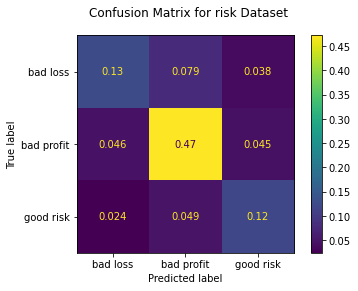

In [144]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

fig = plot_confusion_matrix(KNN, X_test, y_test, display_labels=KNN.classes_, normalize='all')
fig.figure_.suptitle("Confusion Matrix for risk Dataset")
plt.show()